# KICKSTERTER INTERMEDIATE DATA EXPLORATION

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
kick_inter = pd.read_csv('../../data/02_intermediate/kick_inter.csv', 
                         parse_dates=['created_at', 'deadline', 
                                      'last_update_published_at', 
                                      'launched_at', 'state_changed_at'])

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,15,16,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
pd.set_option('display.max_columns', None)

In [36]:
kick_inter.friends.isnull().sum()/len(kick_inter)

0.995106623930982

In [35]:
kick_inter.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'last_update_published_at', 'launched_at', 'name', 'permissions',
       'pledged', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'unread_messages_count',
       'unseen_activity_count', 'urls', 'usd_pledged', 'usd_type',
       'sub_category', 'overall_category', 'city', 'country_loc', 'state_loc',
       'creator_name', 'creator_slug'],
      dtype='object')

**NOTE**: Let's think about the difference between analysis problem and building a model. For instance. The fact that there are both names and ID in the dataset is repetitive information. If we really want to keep the fact that some campaigns were relaunched/ renamed we need to make a boolean feature that is yes or no on that front (though we may not want to do this because it could be leaking future information). 

## FEATURE ENGINEERING TO-DO LIST

**COLUMNS TO DROP:**
* backers_count: contains future information 
* blurb: good for NLP, but not for decision trees (every blurb is unique) 
* currency_symbol: This information is repeated in the currency column, and since these are not words it's difficult to interpret
* currency_trailing_code - this column is redundant with currency column 
* converted pledge amount - this is data lekage
* current_currency - this column is redundant with currency column 
* friends - This column is ~ 99% empty 
* ID/ Name - we need to drop one of these columns (the information contained in them is redundant. Redundant information can make your model less effective. 
* is_backing - this column is ~ 99% empty 
* is_starrable - This looks like it could be leaking future data. Need to look into this column more
* Permissions - this column is ~99% empty 
* slug - this column is redundant with name/ blurb
* source_url - this is not needed for analysis
* spotlight - this is leaking future information (not available when the campaign first comes online) 
* staff_pick - this is leaking future info
* unread_message_count - this column is completly empty 
* unseen_activity_count - this column is completely empty 
* URL - this is not helpful for analysis 
* usd_pleged - this seems to be redundant with currency column (and contains less information) 
* country - This is a reflection of the currency column. once it is established that these columns are the same, one needs to be dropped (should drop the country_loc column) 
* creator_name/ creator_slug - repetative information (one needs to be dropped). 
* disabled communication - only true for live posts
---
**FEATURES TO CREATE (COLUMNS TO KEEP)**
1. blurb - blurb word count
1. launched_at & deadline (length of campaign) 
1. currency
1. disable_communication
1. goal
1. delta between created_at and launched_at 
1. sub_category (159 values) 
1. city
1. country_loc (210 values) 
1. state_loc
---
1. **state [TARGET]**

## EXPLORING OUR DATASET

In [10]:
kick_inter.head(3)

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,last_update_published_at,launched_at,name,permissions,pledged,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,unread_messages_count,unseen_activity_count,urls,usd_pledged,usd_type,sub_category,overall_category,city,country_loc,state_loc,creator_name,creator_slug
0,0,"I'm just going to say it, I'm not special. I'm...",0.0,US,2019-07-15 02:59:36,USD,$,True,USD,2019-08-17 05:04:48,False,NaN,1.000000,5000.0,1893102245,NaN,True,NaN,NaT,2019-07-18 05:04:48,Shirt and hat,NaN,0.0,shirt-and-hat,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-07-18 05:04:48,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",0.0,domestic,Apparel,fashion/apparel,Wasilla,US,AK,Dima01,dima01
1,568,for Tabletop Role Playing Games like Dungeons ...,18969.0,US,2019-06-02 21:06:55,USD,$,True,USD,2019-07-18 03:55:00,False,NaN,1.000000,5000.0,1175125319,NaN,False,NaN,NaT,2019-06-16 02:20:41,RPG Minimalist Creature Dice & Status / Condit...,NaN,18969.0,rpg-minimalist-creature-dice-and-status-condit...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-07-18 03:55:01,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",18969.0,domestic,Tabletop Games,games/tabletop games,Holland,US,MI,quEmpire Gaming,quempire
2,0,Giuliano Clothing is on a mission to reinvent ...,0.0,CA,2019-07-17 23:13:13,CAD,$,True,USD,2019-08-17 03:50:07,False,NaN,0.766388,5000.0,1290757180,NaN,True,NaN,NaT,2019-07-18 03:50:07,Giuliano Clothing: Modern Fashion,NaN,0.0,giuliano-clothing-modern-fashion,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-07-18 03:50:07,0.766254,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",0.0,domestic,Fashion,fashion,Toronto,CA,ON,Giuliano Clothing,giulianoclothing


In [5]:
kick_inter.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'last_update_published_at', 'launched_at', 'name', 'permissions',
       'pledged', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'unread_messages_count',
       'unseen_activity_count', 'urls', 'usd_pledged', 'usd_type',
       'sub_category', 'overall_category', 'city', 'country_loc', 'state_loc',
       'creator_name', 'creator_slug'],
      dtype='object')

In [6]:
kick_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332899 entries, 0 to 332898
Data columns (total 42 columns):
backers_count               332899 non-null int64
blurb                       332889 non-null object
converted_pledged_amount    195183 non-null float64
country                     332899 non-null object
created_at                  332899 non-null datetime64[ns]
currency                    332899 non-null object
currency_symbol             332899 non-null object
currency_trailing_code      332899 non-null bool
current_currency            195183 non-null object
deadline                    332899 non-null datetime64[ns]
disable_communication       332899 non-null bool
friends                     1629 non-null object
fx_rate                     185035 non-null float64
goal                        332899 non-null float64
id                          332899 non-null int64
is_backing                  1629 non-null object
is_starrable                206127 non-null object
is_starred   

In [11]:
kick_inter.describe().T

,count,mean,std,min,25%,50%,75%,max
backers_count,332899.0,1.398791e+02,1.036208e+03,0.000000,3.0,1.800000e+01,7.400000e+01,2.193820e+05
converted_pledged_amount,195183.0,1.330894e+04,9.614274e+04,0.000000,105.0,1.405000e+03,6.289000e+03,1.138545e+07
fx_rate,185035.0,1.042613e+00,2.324627e+00,0.006597,1.0,1.000000e+00,1.000000e+00,1.507221e+02
goal,332899.0,4.666533e+04,1.085352e+06,0.010000,2000.0,5.000000e+03,1.500000e+04,1.000000e+08
id,332899.0,1.074464e+09,6.193287e+08,8624.000000,536884623.5,1.076563e+09,1.609570e+09,2.147476e+09
pledged,332899.0,1.550432e+04,2.928070e+05,0.000000,57.0,1.024000e+03,5.525000e+03,9.886382e+07
static_usd_rate,332899.0,1.010866e+00,2.191453e-01,0.008771,1.0,1.000000e+00,1.000000e+00,1.716408e+00
unread_messages_count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unseen_activity_count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usd_pledged,332899.0,1.209119e+04,1.068236e+05,0.000000,56.0,1.005000e+03,5.359000e+03,2.033899e+07


### country
Mode of the country variable is US (followed by GB). There are 22 different countries in the dataset

In [14]:
kick_inter.country.mode()

0    US
dtype: object

In [50]:
print(len(kick_inter.country.value_counts()))
kick_inter.country.value_counts()

22


US    244692
GB     32424
CA     14335
AU      7556
DE      5087
FR      3897
IT      3715
MX      3201
ES      3144
NL      2780
SE      2030
HK      1513
NZ      1414
DK      1252
SG      1087
CH       987
IE       924
BE       851
NO       752
AT       742
JP       435
LU        81
Name: country, dtype: int64

### Distribution of Quantitative Features

#### goal

Goal is approximately normally distributed. This can be scaled with z-score normalization before being put into a logistic regression or anything else that needs scaling. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


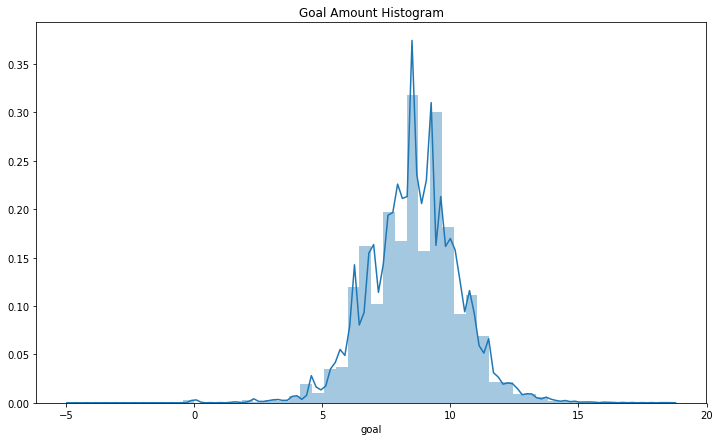

In [74]:
plt.figure(figsize=[12,7])
sns.distplot(np.log((kick_inter.goal)))
plt.title('Goal Amount Histogram')
plt.show()

### Distribution of Categorical Features

#### created_at

In [52]:
kick_inter['created_at_my'] = pd.to_datetime(kick_inter['created_at']).dt.to_period('M')

In [55]:
kick_inter.state.value_counts()

successful    147268
failed        129466
live           38382
canceled       16728
suspended       1055
Name: state, dtype: int64

In [75]:
kick_inter.state.value_counts()

successful    147268
failed        129466
live           38382
canceled       16728
suspended       1055
Name: state, dtype: int64

#### Distribution of State Changed

We are only going to be looking at successful and failed campaigns so let's take a look at the distribution for those categories only. 

In [57]:
kick_inter_results = kick_inter.loc[(kick_inter['state']=='successful') | (kick_inter['state']=='failed')]

In [58]:
len(kick_inter_results)

276734

In [60]:
kick_inter_results.state.value_counts()

successful    147268
failed        129466
Name: state, dtype: int64

In [76]:
kick_inter_results.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'last_update_published_at', 'launched_at', 'name', 'permissions',
       'pledged', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'unread_messages_count',
       'unseen_activity_count', 'urls', 'usd_pledged', 'usd_type',
       'sub_category', 'overall_category', 'city', 'country_loc', 'state_loc',
       'creator_name', 'creator_slug', 'created_at_my'],
      dtype='object')

In [ ]:
kick_inter.isnull().sum/len(ba)

In [81]:
kick_inter_results[['state', 'backers_count']].corr()

,backers_count
backers_count,1.0
